In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel('input_data/control.xlsx',sheet_name='apical')
num_intervals = 100
common_x_axis = np.linspace(-1,1,num_intervals)
interpolated_df1 = pd.DataFrame()

for col in df1.columns:
    x_values = np.linspace(-1, 1, df1[col].count())
    nan_mask = np.isnan(df1[col].values)
    col_values = df1[col].values[~nan_mask]
    interpolated_col = np.interp(common_x_axis, x_values, col_values)
    interpolated_df1[col] = interpolated_col

data_basal1 = interpolated_df1.values
max_data1 = np.max(data_basal1, axis=0)
result_basal1 = data_basal1 / max_data1
mean_basal1 = np.mean(result_basal1, axis=1)
std_basal1 = np.std(result_basal1, axis=1)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.read_excel('input_data/control.xlsx',sheet_name='apical')
num_intervals = 100
common_x_axis = np.linspace(-1,1,num_intervals)
interpolated_df2 = pd.DataFrame()

for col in df2.columns:
    x_values = np.linspace(-1, 1, df2[col].count())
    nan_mask = np.isnan(df2[col].values)
    col_values = df2[col].values[~nan_mask]
    interpolated_col = np.interp(common_x_axis, x_values, col_values)
    interpolated_df2[col] = interpolated_col

data_basal2 = interpolated_df2.values
max_data2 = np.max(data_basal2, axis=0)
result_basal2 = data_basal2 / max_data2
mean_basal2 = np.mean(result_basal2, axis=1)
std_basal2 = np.std(result_basal2, axis=1)

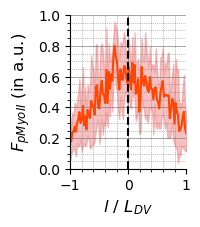

In [16]:
fig, ax = plt.subplots(figsize=(1.5, 2))
plt.rcParams.update({'font.size': 10})

ax.plot(common_x_axis, mean_basal1, color='orangered', label='E.Cad average')
ax.fill_between(common_x_axis, mean_basal1-std_basal1, mean_basal1+std_basal1, alpha=0.5, color='lightcoral')
#ax.plot(common_x_axis, mean_basal2, color='blue')
#ax.fill_between(common_x_axis, mean_basal2-std_basal2, mean_basal2+std_basal2, alpha=0.5, color='lightblue')

ax.set_xlabel('$l$ / $L_{DV}$ ',  fontsize = 12)
ax.set_ylabel('$F_{pMyoII}$ (in a.u.)', fontsize = 12)
ax.grid(which='major', axis='both', linestyle='-', linewidth=0.5, color='gray')
ax.minorticks_on()
ax.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(x=0, color='black', linestyle='--')
ax.set_ylim(0,1)
ax.set_xlim(-1,1)
plt.savefig('Figure3D.svg', format='svg')
plt.show()